In [0]:
from google.colab import drive
drive.mount('/gdrive')

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).


In [0]:
cd '/gdrive/My Drive/Colab Notebooks/Knight ML Assignment/Data'

/gdrive/My Drive/Colab Notebooks/Knight ML Assignment/Data


In [0]:
#Importing Libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [0]:
#Loading Dataset
df=pd.read_csv('train.csv')

In [0]:
df.head()

,user_name,country,review_title,review_description,designation,points,price,province,region_1,region_2,winery,variety
0,NaN,Australia,Andrew Peace 2007 Peace Family Vineyard Chardo...,"Classic Chardonnay aromas of apple, pear and h...",Peace Family Vineyard,83,10.0,Australia Other,South Eastern Australia,NaN,Andrew Peace,Chardonnay
1,@wawinereport,US,North by Northwest 2014 Red (Columbia Valley (...,This wine is near equal parts Syrah and Merlot...,NaN,89,15.0,Washington,Columbia Valley (WA),Columbia Valley,North by Northwest,Red Blend
2,NaN,Italy,Renato Ratti 2007 Conca (Barolo),Barolo Conca opens with inky dark concentratio...,Conca,94,80.0,Piedmont,Barolo,NaN,Renato Ratti,Nebbiolo
3,@vossroger,France,Domaine l'Ancienne Cure 2010 L'Abbaye White (B...,It's impressive what a small addition of Sauvi...,L'Abbaye,87,22.0,Southwest France,Bergerac Sec,NaN,Domaine l'Ancienne Cure,Bordeaux-style White Blend
4,@vossroger,France,Château du Cèdre 2012 Le Cèdre Vintage Malbec ...,"This ripe, sweet wine is rich and full of drie...",Le Cèdre Vintage,88,33.0,France Other,Vin de Liqueur,NaN,Château du Cèdre,Malbec


In [0]:
df.shape

(82657, 12)

In [0]:
#Checking for NULL VALUES Percentage
(df.isnull().sum())/(df.shape[0]) *100

user_name             23.462018
country                0.042344
review_title           0.000000
review_description     0.000000
designation           28.608587
points                 0.000000
price                  6.737481
province               0.042344
region_1              15.430030
region_2              56.508221
winery                 0.000000
variety                0.000000
dtype: float64

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27]),
 <a list of 28 Text major ticklabel objects>)

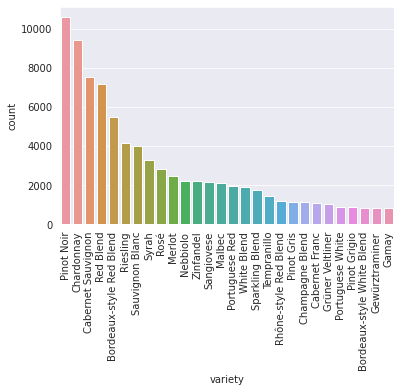

In [0]:
# Distribution of reviews with respect to variety
sns.countplot(x='variety',data=df,order=df['variety'].value_counts().index)
plt.xticks(rotation= 90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37]), <a list of 38 Text major ticklabel objects>)

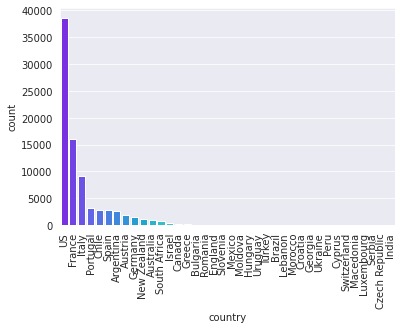

In [0]:
# Distribution of reviews with respect to country
sns.countplot(x='country',data=df,order=df['country'].value_counts().index,palette='rainbow')
plt.xticks(rotation= 90)
#We can see that majority of the reviews are from top 3-12 countries.


In [0]:
df.province.value_counts().head(50)
#Again we can see that majority of the data is from top 50 provinces.

California              25736
Washington               6060
Bordeaux                 4690
Oregon                   3900
Tuscany                  3780
Burgundy                 3179
Mendoza Province         2287
Piedmont                 2226
New York                 1978
Alsace                   1664
Northern Spain           1448
Champagne                1300
Loire Valley             1026
Provence                  956
Douro                     951
Northeastern Italy        907
Southwest France          852
Beaujolais                834
Mosel                     834
Catalonia                 794
Veneto                    656
Marlborough               648
Rhône Valley              628
Sicily & Sardinia         625
Alentejano                623
South Australia           518
Colchagua Valley          483
Casablanca Valley         464
Virginia                  439
Maipo Valley              423
France Other              418
Tejo                      414
Languedoc-Roussillon      401
Central It

# Countries/Province Missing Values Filling

In [0]:
missing_country_winery=df[df['country'].isnull()]['winery'].tolist()

In [0]:
for win in missing_country_winery:
  print(win+" ",df[(df['winery']==win)&(df['country'].notnull())].count()['winery'])

El Capricho  0
St. Donat  0
Orbelus  0
Büyülübağ  0
Ross-idi  0
Bachelder  1
Gotsa Family Wines  0
Neumeister  14
Gotsa Family Wines  0
Mt. Beautiful  3
Mt. Beautiful  3
Tsililis  0
Newton Johnson  1
Psagot  9
Santa Ema  70
Bartho Eksteen  1
Ross-idi  0
Ross-idi  0
Ross-idi  0
Orbelus  0
Les Frères Dutruy  0
Psagot  9
Barton & Guestier  57
Orbelus  0
Undurraga  73
Stone Castle  0
Tsililis  0
Barton & Guestier  57
Chilcas  31
Ktima Voyatzi  1
Psagot  9
Stone Castle  0
Neumeister  14
El Capricho  0
Lismore  0


In [0]:
#since we have data for countries/province for some wineries above. We can fill them up, and drop the rest of the rows.

In [0]:
x=[]
for win in missing_country_winery:
  if df[(df['winery']==win)&(df['country'].notnull())].count()['winery'] == 0:
    x.append(win)

In [0]:
for win in missing_country_winery:
  if win not in x:
    df.loc[df[(df['winery']==win)&(df['country'].isnull())].index,'country'] = df.loc[df[(df['winery']==win)&(df['country'].notnull())].index,'country'].unique()[0]
    df.loc[df[(df['winery']==win)&(df['province'].isnull())].index,'province'] = df.loc[df[(df['winery']==win)&(df['province'].notnull())].index,'province'].unique()[0]

In [0]:
#Dropping the rest of the reviews with missing country values.
df.drop(df[df['country'].isnull()].index,inplace=True)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23]),
 <a list of 24 Text major ticklabel objects>)

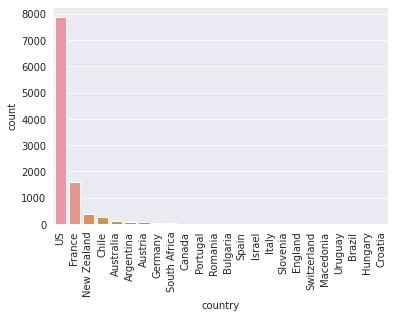

In [0]:
sns.countplot('country',data=df[df['variety']=='Pinot Noir'],order=df[df['variety']=='Pinot Noir'].country.value_counts().index)
plt.xticks(rotation=90)

# Getting the missing values of Prices 

(0.0, 500.0)

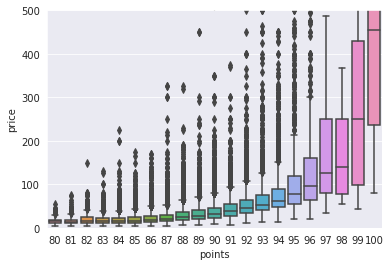

In [0]:
# There is a high correlation between points and price
# And there are 6% values for the price that are missing, so we can predict them using linear regression.
sns.boxplot(df['points'],df['price'])
plt.ylim((0,500))

In [0]:
#Now comparing prices with different varities of wine.
mean_prices_variety = pd.DataFrame(df.groupby('variety').mean()['price'].sort_values())

In [0]:
mean_prices_variety = mean_prices_variety.reset_index()

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27]),
 <a list of 28 Text major ticklabel objects>)

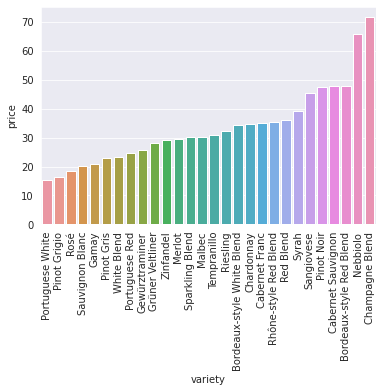

In [0]:
sns.barplot(x='variety',y='price',data=mean_prices_variety)
plt.xticks(rotation=90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37]), <a list of 38 Text major ticklabel objects>)

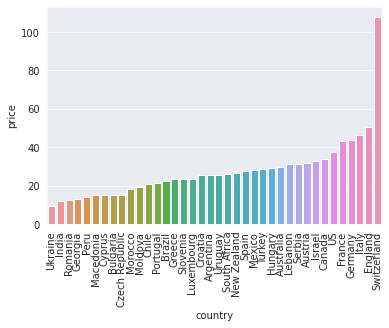

In [0]:
#Distribution of mean prices with respect to countries.
sns.set_style('darkgrid')
sns.barplot(y=df.groupby('country')['price'].mean().sort_values(),x=df.groupby('country')['price'].mean().sort_values().index)
plt.xticks(rotation=90)

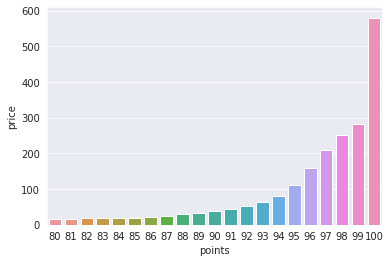

In [0]:
#Mean values of prices vs points
sns.barplot(y=df.groupby('points').mean().sort_values('points')['price'],x=df.groupby('points').mean().sort_values('points').index)

In [0]:
# We will set the missing values of price equal to the mean values with respect to the point.
mean_prices_points = pd.DataFrame(df.groupby('points').mean()['price'].sort_values())

In [0]:
mean_prices_points=mean_prices_points.to_dict()['price']

In [0]:
df.loc[df[df['price'].isnull()].index,'points'].map(mean_prices_points)

23       44.452215
28       52.661692
46       19.562691
59       52.661692
61       52.661692
           ...    
82572    52.661692
82605    25.860099
82619    29.835917
82634    25.860099
82650    22.967692
Name: points, Length: 5569, dtype: float64

In [0]:
df.loc[df[df['price'].isnull()].index,'price']=df.loc[df[df['price'].isnull()].index,'points'].map(mean_prices_points)

In [0]:
#Technically Username should not affect the variety.. so dropping it out
df.drop('user_name',axis=1,inplace=True)

In [0]:
# Also near about 57 percent of the vlaues in the column region_2 is missing, that is a lot. Dropping it out 
df.drop('region_2',axis=1,inplace=True)

In [0]:
df.to_csv('cleaned_train.csv',index=False)

#Dropping Off Insignificant Countries

In [0]:
#Considering countries to be insignificant in data with a frequency of less than 500 and dropping them off  
c= pd.DataFrame(df.country.value_counts())

In [0]:
insig_countries = c[c.country <500].index

Index(['Israel', 'Canada', 'Greece', 'Bulgaria', 'Romania', 'England',
       'Slovenia', 'Mexico', 'Hungary', 'Moldova', 'Turkey', 'Uruguay',
       'Lebanon', 'Brazil', 'Morocco', 'Georgia', 'Croatia', 'Ukraine', 'Peru',
       'Cyprus', 'Macedonia', 'Luxembourg', 'Switzerland', 'Serbia',
       'Czech Republic', 'India'],
      dtype='object')

In [0]:
def remove_countries(c):
  if c in insig_countries:
    return True
  else:
    return False

In [0]:
 df.drop(df[df['country'].apply(remove_countries)].index,inplace=True)

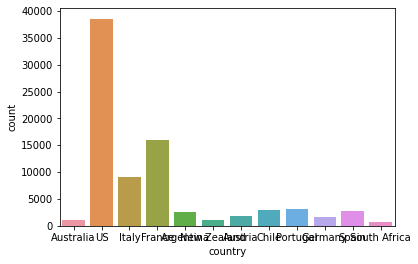

In [0]:
sns.countplot('country',data=df)

In [0]:
df.to_csv('cleaned_train.csv',index=False)

# Dropping Off Insignificant Provinces

In [0]:
#Considering provinces to be insignificant in data with a frequency of less than 100 and dropping them off
c= pd.DataFrame(df.province.value_counts())

In [0]:
insig_provinces = c[c.province <100].index

In [0]:
insig_provinces

Index(['Hawke's Bay', 'Rapel Valley', 'Mosel-Saar-Ruwer',
       'Península de Setúbal', 'Weinviertel', 'Martinborough', 'Limarí Valley',
       'Michigan', 'Südsteiermark', 'Bairrada',
       ...
       'Portugal', 'Helderberg', 'Paardeberg', 'Bot River', 'Table wine',
       'Hawaii', 'Távora-Varosa', 'Neusiedlersee', 'Vinho Espumante',
       'South Africa'],
      dtype='object', length=166)

In [0]:
def remove_provinces(c):
  if c in insig_provinces:
    return True
  else:
    return False

In [0]:
 df.drop(df[df['province'].apply(remove_provinces)].index,inplace=True)

In [0]:
df.to_csv('cleaned_train.csv',index=False)